**K-nn on synthetic datasets**

In [5]:
%matplotlib notebook

In [6]:
import tensorflow as tf
import numpy as np
import time

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

In [7]:
N=210
K=2
# Maximum number of iterations, if the conditions are not met
MAX_ITERS = 1000
cut=int(N*0.7)

start = time.time()

**Model architecture**

The variables that will sustain data are simply the original data and a test list, which will hold
the calculated classes for the test data:

In [8]:
data, features = make_circles(n_samples=N, shuffle=True, noise= 0.12, factor=0.4)
tr_data, tr_features= data[:cut], features[:cut]
te_data,te_features=data[cut:], features[cut:]

**Plot Data Generated**

<IPython.core.display.Javascript object>


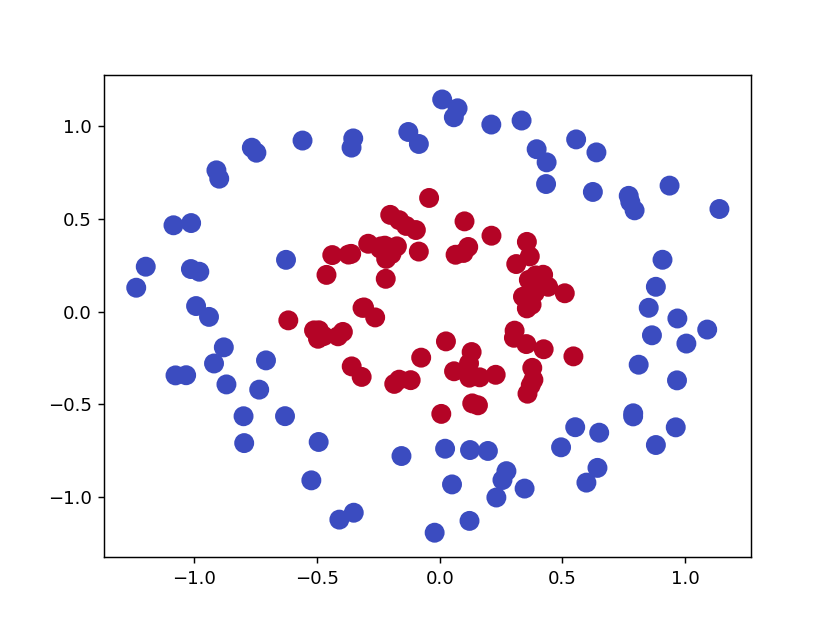

[]

In [9]:
fig, ax = plt.subplots()
ax.scatter(tr_data.transpose()[0], tr_data.transpose()[1], marker = 'o', s = 100, c = tr_features, cmap=plt.cm.coolwarm )
plt.plot()

In [ ]:
points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))

**Initiate the TensorFlow Session**

In [ ]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

**Loss function description**

In clustering, we will use the function to optimize as **the Euclidean distance**. 
It is calculated on the cluster assignment loop,
getting the distance from the new point to the existing training points, asking for the index of
the minimum, and then using that index to search the class of the nearest neighbor:

[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]


<IPython.core.display.Javascript object>


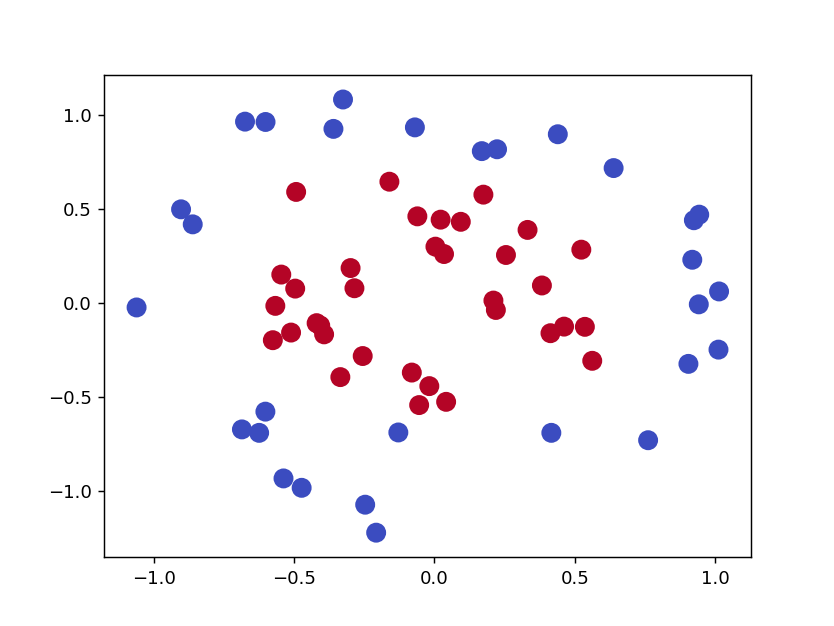

[]

In [15]:
test=[]

for i, j in zip(te_data, te_features):
    distances = tf.reduce_sum(tf.square(tf.subtract(i , tr_data)),reduction_indices=1) ##Loss Function
    neighbor = tf.math.argmin(distances,0)                                                 ##Get the minimum
    
    #print tr_features[sess.run(neighbor)]
    #print j
    test.append(tr_features[sess.run(neighbor)])

print(test)
fig, ax = plt.subplots()
ax.scatter(te_data.transpose()[0], te_data.transpose()[1], marker = 'o', s = 100, c = test, cmap=plt.cm.coolwarm )
plt.plot()

In [17]:
end = time.time()
print("Found in %.2f seconds" % (end-start))
print("Cluster assignments:", test)

Found in 1190.59 seconds
Cluster assignments: [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]
